In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import math
from enum import Enum
# from plotly.express import line
#import df
#import plotly.express as px
# %matplotlib inline 
sns.set(style="ticks")
plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [155]:
encoding = 'windows-1250'
data=pd.read_csv(r'C:\Users\Dima\Desktop\Homework\3 курс\ТМО\ЛР3\supply_chain_data.csv', encoding = encoding)
data_train = pd.read_csv(r'C:\Users\Dima\Desktop\Homework\3 курс\ТМО\ЛР3\supply_chain_data.csv', sep=",")
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [156]:
data.shape

(100, 24)

In [157]:
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [231]:
data_train.shape

(100, 24)

In [230]:
test_data.shape

(30, 4)

# Разделение выборки на обучающую и тестовую
*С использованием метода train_test_split*

In [159]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Подготовка данных
# Предположим, что мы хотим использовать признаки 'Price', 'Availability', 'Stock levels' для предсказания 'Product Type'
X = data[['Price', 'Availability', 'Stock levels']]
y = data['Product type']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация и обучение модели k-ближайших соседей
k = 3  # количество соседей
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Предсказание классов для тестового набора данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3


In [160]:
# Создание переменных для обучающего и тестового наборов
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
# train_data
# test_data

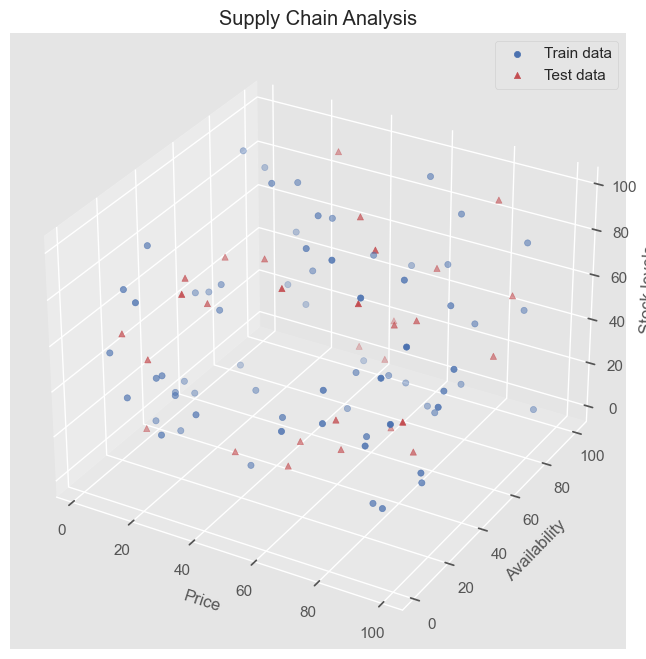

In [161]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Обучающая выборка
ax.scatter(X_train['Price'], X_train['Availability'], X_train['Stock levels'], c='b', marker='o', label='Train data')

# Тестовая выборка
ax.scatter(X_test['Price'], X_test['Availability'], X_test['Stock levels'], c='r', marker='^', label='Test data')

ax.set_xlabel('Price')
ax.set_ylabel('Availability')
ax.set_zlabel('Stock levels')
ax.set_title('Supply Chain Analysis')

plt.legend()
plt.show()

## Реализация алгоритма k-ближайших соседей

In [162]:
import numpy as np

class SimpleKNNRegressor:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, p, q):
        return np.sqrt(np.sum((p - q) ** 2))

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Рассчитываем расстояния от текущего объекта тестовой выборки до всех объектов обучающей выборки
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            # Сортируем индексы объектов обучающей выборки по расстоянию
            nearest_indices = np.argsort(distances)[:self.k]
            # Получаем соответствующие значения целевой переменной для k ближайших соседей
            nearest_y = self.y_train[nearest_indices]
            # Предсказываем значение целевой переменной для текущего объекта тестовой выборки как среднее значение целевой переменной для k ближайших соседей
            y_pred.append(np.mean(nearest_y))
        return np.array(y_pred)


In [163]:

class SimpleKNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, p, q):
        return np.sqrt(np.sum((p - q) ** 2))

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Рассчитываем расстояния от текущего объекта тестовой выборки до всех объектов обучающей выборки
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            # Сортируем индексы объектов обучающей выборки по расстоянию
            nearest_indices = np.argsort(distances)[:self.k]
            # Получаем соответствующие значения целевой переменной для k ближайших соседей
            nearest_classes = self.y_train[nearest_indices]
            # Предсказываем класс для текущего объекта тестовой выборки как наиболее часто встречающийся класс среди k ближайших соседей
            y_pred.append(np.bincount(nearest_classes).argmax())
        return np.array(y_pred)


В случае классификации часто используются метрики, такие как точность (accuracy), матрица ошибок (confusion matrix), точность (precision), полнота (recall), F1-мера и ROC-кривая.

В случае регрессии, кроме среднеквадратичной ошибки (MSE), могут использоваться коэффициент детерминации (R^2), средняя абсолютная ошибка (MAE) и другие.

In [164]:
    # Инициализация и обучение модели с произвольным гиперпараметром k
k = 5  # Произвольно заданный гиперпараметр
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Предсказание классов для тестового набора данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.26666666666666666


In [165]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Оценка precision
precision = precision_score(y_test, y_pred, average='weighted')

# Оценка recall
recall = recall_score(y_test, y_pred, average='weighted')

# Оценка F1-меры
f1 = f1_score(y_test, y_pred, average='weighted')

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.3
Recall: 0.26666666666666666
F1 Score: 0.273015873015873
Confusion Matrix:
[[2 3 1]
 [6 2 4]
 [4 4 4]]


## Подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации
### Оценка качества оптимальной модели. 
*Использование не менее двух стратегий кросс-валидации*

In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Определение модели
model = KNeighborsClassifier()

# Подготовка стратегий кросс-валидации
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# KFold and StratifiedKFold
# Параметры для подбора
param_grid = {'n_neighbors': range(1, 21)}

# Подбор гиперпараметра с использованием GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=skf)
grid_search.fit(X_train, y_train)

print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best accuracy (GridSearchCV):", grid_search.best_score_)

# Оценка качества оптимальной модели с использованием кросс-валидации KFold
cv_scores_kf = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=skf)
print("Cross-validation scores (KFold):", cv_scores_kf)
print("Mean CV accuracy (KFold):", cv_scores_kf.mean())

# Подбор гиперпараметра с использованием RandomizedSearchCV
# random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=skf)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=skf)

random_search.fit(X_train, y_train)

print("\nBest parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best accuracy (RandomizedSearchCV):", random_search.best_score_)

# Оценка качества оптимальной модели с использованием кросс-валидации StratifiedKFold
cv_scores_skf = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=skf)
print("Cross-validation scores (StratifiedKFold):", cv_scores_skf)
print("Mean CV accuracy (StratifiedKFold):", cv_scores_skf.mean())

# Оценка качества на тестовом наборе
test_accuracy = accuracy_score(y_test, random_search.predict(X_test))
print("\nTest accuracy:", test_accuracy)


Best parameters (GridSearchCV): {'n_neighbors': 12}
Best accuracy (GridSearchCV): 0.4999999999999999
Cross-validation scores (KFold): [0.21428571 0.57142857 0.71428571 0.57142857 0.42857143]
Mean CV accuracy (KFold): 0.4999999999999999

Best parameters (RandomizedSearchCV): {'n_neighbors': 11}
Best accuracy (RandomizedSearchCV): 0.42857142857142855
Cross-validation scores (StratifiedKFold): [0.28571429 0.42857143 0.64285714 0.42857143 0.35714286]
Mean CV accuracy (StratifiedKFold): 0.42857142857142855

Test accuracy: 0.23333333333333334


In [167]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [168]:
# В моделях k-ближайших соседей большое значение k 
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 70 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.4, 0.4)

In [169]:
# 5 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=5)
cl1_2.fit(X_train, y_train)
target1_0 = cl1_2.predict(X_train)
target1_1 = cl1_2.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.6285714285714286, 0.26666666666666666)

In [170]:
# 1 ближайший сосед - "условное" переобучение
cl1_2 = KNeighborsClassifier(n_neighbors=1)
cl1_2.fit(X_train, y_train)
target1_0 = cl1_2.predict(X_train)
target1_1 = cl1_2.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(1.0, 0.3)

In [203]:
X = data[['Price', 'Availability', 'Stock levels']]
y = data['Product type']
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), X, y, cv=3)
print("Cross-validation scores (StratifiedKFold):", scores)
print("Mean CV accuracy (StratifiedKFold):", scores.mean())
scores

Cross-validation scores (StratifiedKFold): [0.35294118 0.36363636 0.33333333]
Mean CV accuracy (StratifiedKFold): 0.3499702911467617


array([0.35294118, 0.36363636, 0.33333333])

In [184]:
np.mean(scores)

0.3499702911467617

In [198]:
# использование метрики f1
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores_f1 = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X, y, cv=3,
                        scoring='f1_weighted')
scores_f1, np.mean(scores_f1)

(array([0.32520124, 0.21801347, 0.2793784 ]), 0.27419770192732007)

In [200]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores_sc = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X, y, scoring=scoring, 
                        cv=3, return_train_score=True)
scores_sc

{'fit_time': array([0.0049994 , 0.00500035, 0.00698948]),
 'score_time': array([0.02803612, 0.02406406, 0.02396345]),
 'test_precision': array([0.34436275, 0.31934732, 0.38069773]),
 'train_precision': array([0.7946515 , 0.75767591, 0.76663557]),
 'test_recall': array([0.35294118, 0.21212121, 0.33333333]),
 'train_recall': array([0.6969697 , 0.65671642, 0.64179104]),
 'test_f1': array([0.32520124, 0.21801347, 0.2793784 ]),
 'train_f1': array([0.6700157 , 0.62992182, 0.60744441])}

### K-fold

In [182]:
# Возвращаются индексы элементов
X = ["a", "b", "c"]
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


In [194]:
X = range(12)
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    


[ 4  5  6  7  8  9 10 11] [0 1 2 3]
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]


In [202]:
kf = KFold(n_splits=5)
scores_kf = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X, y, cv=kf,
                         scoring='f1_weighted')
scores_kf

array([0.23296703, 0.30314685, 0.15238095, 0.43598086, 0.31278195])

In [204]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X, y, scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.00800109, 0.00496006, 0.00500059, 0.00400233, 0.00400186]),
 'score_time': array([0.02299333, 0.01700282, 0.01600027, 0.0170033 , 0.0230248 ]),
 'test_precision': array([0.70055556, 0.30833333, 0.18666667, 0.51515152, 0.3375    ]),
 'train_precision': array([0.78764952, 0.78426916, 0.78475936, 0.78018018, 0.7696654 ]),
 'test_recall': array([0.3 , 0.3 , 0.15, 0.45, 0.35]),
 'train_recall': array([0.7   , 0.675 , 0.7   , 0.6875, 0.6375]),
 'test_f1': array([0.23296703, 0.30314685, 0.15238095, 0.43598086, 0.31278195]),
 'train_f1': array([0.66771871, 0.65787302, 0.67853847, 0.66833871, 0.60468597])}

### Оптимизация гиперпараметров

In [205]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [206]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, y_train)

CPU times: total: 1.06 s
Wall time: 829 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [208]:
clf_gs.cv_results_

{'mean_fit_time': array([0.0049005 , 0.01144094, 0.00480185, 0.00431795, 0.00340757,
        0.00463495, 0.00379467, 0.00359592, 0.00337019, 0.00603967]),
 'std_fit_time': array([0.00085758, 0.00852521, 0.000983  , 0.00058175, 0.0004576 ,
        0.00115519, 0.00121258, 0.0010182 , 0.00085729, 0.00168337]),
 'mean_score_time': array([0.00905538, 0.01441445, 0.00840063, 0.0074893 , 0.00705733,
        0.01173081, 0.01121855, 0.00883884, 0.01040835, 0.01673279]),
 'std_score_time': array([0.00177465, 0.00620442, 0.00173467, 0.00198666, 0.00083782,
        0.00145579, 0.00174055, 0.00133728, 0.00205124, 0.00231324]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

In [209]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier()

In [211]:
# Лучшее значение метрики
clf_gs.best_score_

0.4428571428571429

In [212]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 5}

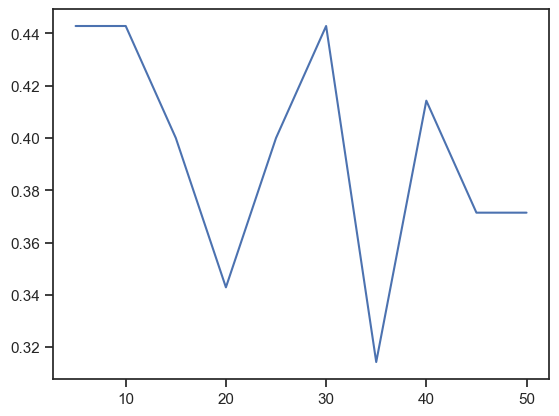

In [214]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Построение кривых обучения

In [215]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Dima\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

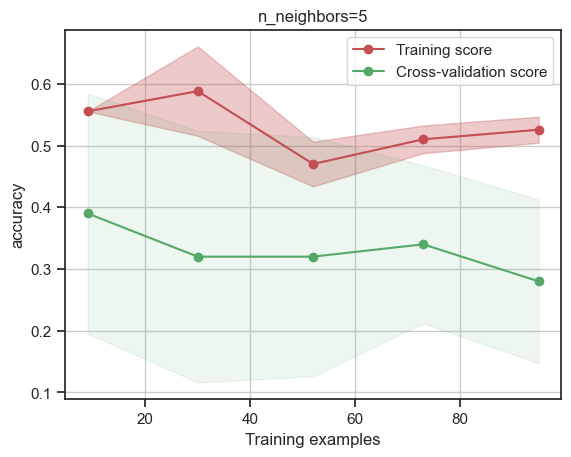

In [217]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    X, y, cv=20)

<module 'matplotlib.pyplot' from 'C:\\Users\\Dima\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

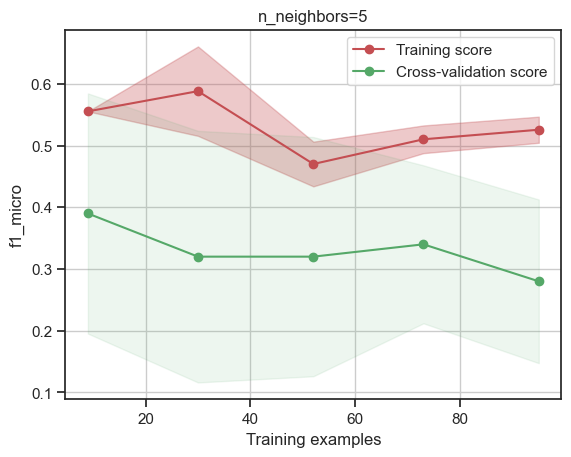

In [219]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    X, y, cv=20, scoring='f1_micro')

<module 'matplotlib.pyplot' from 'C:\\Users\\Dima\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

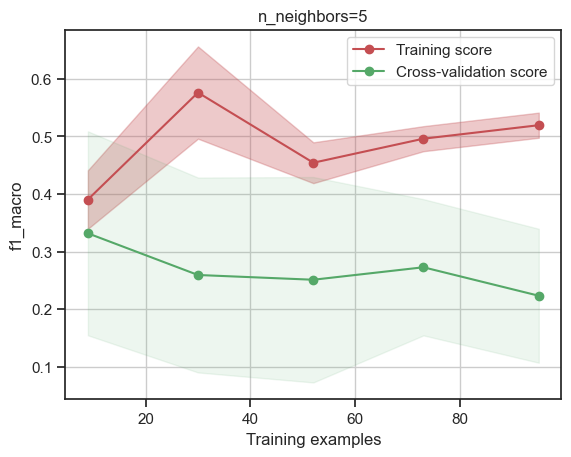

In [220]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    X, y, cv=20, scoring='f1_macro')

In [222]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Dima\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

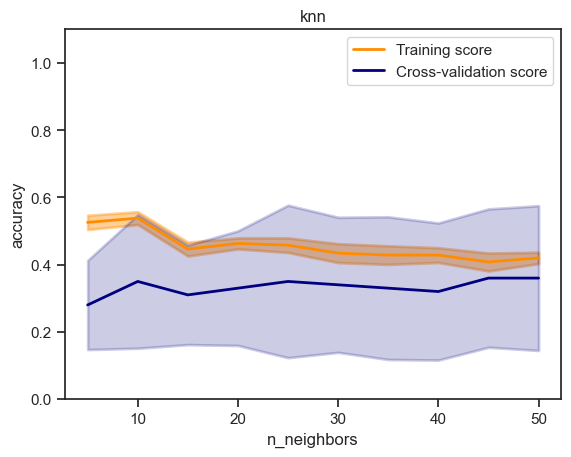

In [223]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X, y, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="accuracy")

In [227]:
initial_model = KNeighborsClassifier(n_neighbors=5)
initial_model.fit(X_train, y_train)
# Создание и обучение оптимальной модели с помощью GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
optimal_model = grid_search.best_estimator_

# Оценка исходной модели
y_pred_initial = initial_model.predict(X_test)
accuracy_initial = accuracy_score(y_test, y_pred_initial)
precision_initial = precision_score(y_test, y_pred_initial, average='weighted')
recall_initial = recall_score(y_test, y_pred_initial, average='weighted')
f1_initial = f1_score(y_test, y_pred_initial, average='weighted')

# Оценка оптимальной модели
y_pred_optimal = optimal_model.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal, average='weighted')
recall_optimal = recall_score(y_test, y_pred_optimal, average='weighted')
f1_optimal = f1_score(y_test, y_pred_optimal, average='weighted')

# Вывод метрик
print("Исходная модель:")
print("Accuracy:", accuracy_initial)
print("Precision:", precision_initial)
print("Recall:", recall_initial)
print("F1 Score:", f1_initial)
print()

print("Оптимальная модель:")
print("Accuracy:", accuracy_optimal)
print("Precision:", precision_optimal)
print("Recall:", recall_optimal)
print("F1 Score:", f1_optimal)

Исходная модель:
Accuracy: 0.26666666666666666
Precision: 0.3
Recall: 0.26666666666666666
F1 Score: 0.273015873015873

Оптимальная модель:
Accuracy: 0.26666666666666666
Precision: 0.3
Recall: 0.26666666666666666
F1 Score: 0.273015873015873
